 목표: 다음 분기에 어떤 게임을 설계해야 할까 (게임 회사의 데이터 팀)

*   다음 분기에 어떤 게임을 설계해야 할까
*   의사결정

https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

데이터셋을 읽는 것 ~ 이러한 게임을 만들어야 한다는 결론까지 의 과정 + 설명하는 영상(5분)
시간 초과X

In [1]:
#Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization
#Sprint 2 : Hypothesis Test, CI, Bayesian
#Sprint 3 : DR, PCA, Cluster

In [2]:
# 1.  지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
# 2.  연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
# 3.  출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
''' 위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성
    가능한 코드에 커멘트를 달아주는 것이 권장되지만, 모든 코드 내용을 한줄 한줄 설명할 필요는 없습니다.
    단, 내가 이런 분석을 했는데 이 부분은 꼭 설명하고 싶다, 라는 내용이 있으면 설명해도 좋습니다. '''
#   듣는 사람은 비데이터 직군이라 가정

' 위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성\n    가능한 코드에 커멘트를 달아주는 것이 권장되지만, 모든 코드 내용을 한줄 한줄 설명할 필요는 없습니다.\n    단, 내가 이런 분석을 했는데 이 부분은 꼭 설명하고 싶다, 라는 내용이 있으면 설명해도 좋습니다. '

## Project

In [3]:
# 플랫폼의 종류 다양하게 나눠져 있음
# Year는 실수형인데, 시계열로 (알아봐야) - 출시년도
# 장르도 나눠져 있음 
# Publisher 게임 제작 회사
# Sales는 출고량.
  # NA_Sales 북미지역
  # EU_Sales 유럽지역
  # JP_Sales 일본지역
  # Other_Sales 기타

In [4]:
# 1.  지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다. (자료 준비 완료)
# 2.  연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
# 3.  출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
''' NOTE
* 플랫폼 분포( 얼마나 있는지- 개수)
* 장르별 분포 (전체적인 장르 분포 알 수 있음) (완료)
* Sales 분포 (지열별) (완료)
* 장르별 Sales ; NA/ EU/ JP/ Others (필수) (완료)
** 연도에 따른 장르별 분포 또한 알아보고 (필수)
** 플랫폼 별 장르 분포

* Publisher 별 분포 (누가 더 많이 제작했는지 알 수 있을 것)
* Publisher 별 Sales ; NA/ EU/ JP / Others - 그래프나 시각적 자료로 표현
'''


' NOTE\n* 플랫폼 분포( 얼마나 있는지- 개수)\n* 장르별 분포 (전체적인 장르 분포 알 수 있음) (완료)\n* Sales 분포 (지열별) (완료)\n* 장르별 Sales ; NA/ EU/ JP/ Others (필수) (완료)\n** 연도에 따른 장르별 분포 또한 알아보고 (필수)\n** 플랫폼 별 장르 분포\n\n* Publisher 별 분포 (누가 더 많이 제작했는지 알 수 있을 것)\n* Publisher 별 Sales ; NA/ EU/ JP / Others - 그래프나 시각적 자료로 표현\n'

### Project 준비과정

#### Data 불러오기

In [5]:
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [8]:
df=df.iloc[:,1:]
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [9]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


#### 먼저 데이터 파악

In [10]:
df.info() 
#16598 개의 데이터 --> 결측치 처리 후 16241 data 
    #Year, Genre, Publisher 데이터 부족 --> 결측치 있는 행을 확인해보려 했으나, 집단이 상이해지므로 삭제했음 (완료)
# 수치형 데이터가 Year밖에 없음. # Sales는 숫자형으로 바꿔줘야 --> (완료)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


#### 전처리(Sales)

In [11]:
#결측치 전처리

In [12]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [13]:
df = df.dropna()
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [14]:
#Sales 수치형으로 전환(출고량이기 때문에 숫자형으로 변환시켜준다.)

In [15]:
def replaceother(string):
  try:
    tmp=float(string)
  except:
    tmp=0
  return tmp
#  return (string.replace('0.',''))

In [16]:
df['NA_Sales']=df['NA_Sales'].apply(replaceother)
df['EU_Sales']=df['EU_Sales'].apply(replaceother)
df['JP_Sales']=df['JP_Sales'].apply(replaceother)
df['Other_Sales']=df['Other_Sales'].apply(replaceother)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [17]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [19]:
df['NA_Sales']=df['NA_Sales']*100
df['EU_Sales']=df['EU_Sales']*100
df['JP_Sales']=df['JP_Sales']*100
df['Other_Sales']=df['Other_Sales']*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

####시계열 전처리

In [20]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,4.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,17.0,0.0,0.0,1.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,2.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,4.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,12.0,9.0,0.0,4.0


In [21]:
df['Year']=df['Year'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
def replaceother2(str):
  return (str.replace('.0',''))

In [23]:
df['Year']=df['Year'].apply(replaceother2)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17.0,0.0,0.0,1.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12.0,9.0,0.0,4.0


In [24]:
#df['Year']=pd.to_datetime(df.Year)

In [25]:
#df['Year']=df['Year'].dt.year

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  object 
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


In [27]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17.0,0.0,0.0,1.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12.0,9.0,0.0,4.0


#### 데이터 재파악

In [28]:
df.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000
mean,26.060280,14.526445,7.705375,4.777661
std,81.469229,50.617287,30.626823,18.951640
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,8.000000,2.000000,0.000000,1.000000
75%,23.000000,11.000000,4.000000,3.000000
max,4149.000000,2902.000000,1022.000000,1057.000000


### 칼럼 별 현황

In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17.0,0.0,0.0,1.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12.0,9.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,15.0,4.0,0.0,1.0
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,1.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,44.0,19.0,3.0,13.0
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,5.0,5.0,25.0,3.0


In [31]:
df['SUM_Sales']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4.0,0.0,0.0,0.0,4.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17.0,0.0,0.0,1.0,18.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2.0,0.0,2.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4.0,0.0,0.0,0.0,4.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12.0,9.0,0.0,4.0,25.0
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,15.0,4.0,0.0,1.0,20.0
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,1.0,0.0,0.0,0.0,1.0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,44.0,19.0,3.0,13.0,79.0
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,5.0,5.0,25.0,3.0,38.0


#### 플랫폼에 따른  Sales (SUM 포함)

In [32]:
gb_platform= df.groupby('Platform').sum()
gb_platform = pd.DataFrame(gb_platform) #새로운 데이터 프레임 생성
gb_platform.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
Platform,,,,,
2600,8032.0,472.0,0.0,83.0,8587.0
3DO,0.0,0.0,10.0,0.0,10.0
3DS,7231.0,5377.0,9275.0,1154.0,23037.0
DC,543.0,169.0,856.0,27.0,1595.0
DS,38276.0,19257.0,17372.0,6005.0,80910.0


In [33]:
gb_platform['Sales sum']=gb_platform['NA_Sales']+gb_platform['EU_Sales']+gb_platform['JP_Sales']+gb_platform['Other_Sales']
gb_platform.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales,Sales sum
Platform,,,,,,
2600,8032.0,472.0,0.0,83.0,8587.0,8587.0
3DO,0.0,0.0,10.0,0.0,10.0,10.0
3DS,7231.0,5377.0,9275.0,1154.0,23037.0,23037.0
DC,543.0,169.0,856.0,27.0,1595.0,1595.0
DS,38276.0,19257.0,17372.0,6005.0,80910.0,80910.0


In [34]:
tgb_platform= gb_platform.T
tgb_platform

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
NA_Sales,8032.0,0.0,7231.0,543.0,38276.0,11364.0,17328.0,13116.0,1927.0,0.0,12809.0,12542.0,0.0,9119.0,0.0,32847.0,56289.0,38417.0,9215.0,10594.0,1547.0,38.0,100.0,6123.0,0.0,0.0,48960.0,3714.0,57177.0,17806.0,8131.0
EU_Sales,472.0,0.0,5377.0,169.0,19257.0,4751.0,7160.0,3776.0,552.0,0.0,3753.0,2115.0,0.0,13549.0,0.0,20903.0,32727.0,33290.0,12252.0,6681.0,1619.0,54.0,36.0,1904.0,0.0,0.0,25882.0,2356.0,27120.0,5759.0,4410.0
JP_Sales,0.0,10.0,9275.0,856.0,17372.0,8193.0,4341.0,2087.0,241.0,4.0,3241.0,9865.0,144.0,17.0,3.0,13271.0,13327.0,7794.0,1399.0,7510.0,2075.0,3119.0,45.0,11631.0,16.0,142.0,6493.0,1279.0,1221.0,138.0,34.0
Other_Sales,83.0,0.0,1154.0,27.0,6005.0,816.0,748.0,507.0,89.0,0.0,424.0,510.0,0.0,2386.0,0.0,4009.0,18649.0,13904.0,4230.0,4130.0,836.0,7.0,5.0,322.0,0.0,0.0,7804.0,645.0,8286.0,827.0,1191.0
SUM_Sales,8587.0,10.0,23037.0,1595.0,80910.0,25124.0,29577.0,19486.0,2809.0,4.0,20227.0,25032.0,144.0,25071.0,3.0,71030.0,120992.0,93405.0,27096.0,28915.0,6077.0,3218.0,186.0,19980.0,16.0,142.0,89139.0,7994.0,93804.0,24530.0,13766.0
Sales sum,8587.0,10.0,23037.0,1595.0,80910.0,25124.0,29577.0,19486.0,2809.0,4.0,20227.0,25032.0,144.0,25071.0,3.0,71030.0,120992.0,93405.0,27096.0,28915.0,6077.0,3218.0,186.0,19980.0,16.0,142.0,89139.0,7994.0,93804.0,24530.0,13766.0


In [35]:
tgb_platform.columns

Index(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object', name='Platform')

#### 플랫봄 비 세일즈 (SUM 제외)

In [36]:
tgb_platform_sales_sum = gb_platform[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
tgb_platform_sales_sum= tgb_platform_sales_sum.T
tgb_platform_sales_sum

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
NA_Sales,8032.0,0.0,7231.0,543.0,38276.0,11364.0,17328.0,13116.0,1927.0,0.0,12809.0,12542.0,0.0,9119.0,0.0,32847.0,56289.0,38417.0,9215.0,10594.0,1547.0,38.0,100.0,6123.0,0.0,0.0,48960.0,3714.0,57177.0,17806.0,8131.0
EU_Sales,472.0,0.0,5377.0,169.0,19257.0,4751.0,7160.0,3776.0,552.0,0.0,3753.0,2115.0,0.0,13549.0,0.0,20903.0,32727.0,33290.0,12252.0,6681.0,1619.0,54.0,36.0,1904.0,0.0,0.0,25882.0,2356.0,27120.0,5759.0,4410.0
JP_Sales,0.0,10.0,9275.0,856.0,17372.0,8193.0,4341.0,2087.0,241.0,4.0,3241.0,9865.0,144.0,17.0,3.0,13271.0,13327.0,7794.0,1399.0,7510.0,2075.0,3119.0,45.0,11631.0,16.0,142.0,6493.0,1279.0,1221.0,138.0,34.0
Other_Sales,83.0,0.0,1154.0,27.0,6005.0,816.0,748.0,507.0,89.0,0.0,424.0,510.0,0.0,2386.0,0.0,4009.0,18649.0,13904.0,4230.0,4130.0,836.0,7.0,5.0,322.0,0.0,0.0,7804.0,645.0,8286.0,827.0,1191.0


In [37]:
tgb_platform_tidy = tgb_platform_sales_sum.melt()
tgb_platform_tidy

,Platform,value
0,2600,8032.0
1,2600,472.0
2,2600,0.0
3,2600,83.0
4,3DO,0.0
...,...,...
119,XB,827.0
120,XOne,8131.0
121,XOne,4410.0
122,XOne,34.0


In [38]:
# 큰 순서대로 정렬하기

In [39]:
tgb_platform_tidy=tgb_platform_tidy.sort_values(by='value',ascending=False)
tgb_platform_tidy

,Platform,value
112,X360,57177.0
64,PS2,56289.0
104,Wii,48960.0
68,PS3,38417.0
16,DS,38276.0
...,...,...
103,WS,0.0
96,TG16,0.0
101,WS,0.0
100,WS,0.0


#### 장르 별 Sales

In [40]:
gb_Genre= df.groupby('Genre').sum()
gb_Genre = pd.DataFrame(gb_Genre) #새로운 데이터 프레임 생성
gb_Genre.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
Genre,,,,,
Action,83728.0,50661.0,15516.0,18265.0,168170.0
Adventure,10103.0,6347.0,5179.0,1642.0,23271.0
Fighting,21899.0,9848.0,8580.0,3565.0,43892.0
Misc,39064.0,20533.0,10376.0,7218.0,77191.0
Platform,44016.0,19301.0,12974.0,5097.0,81388.0


In [41]:
Genre_total_Sales = gb_Genre['NA_Sales']+gb_Genre['EU_Sales']+gb_Genre['JP_Sales']+gb_Genre['Other_Sales']
Genre_total_Sales = pd.DataFrame(Genre_total_Sales).T
Genre_total_Sales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,168170.0,23271.0,43892.0,77191.0,81388.0,24019.0,70786.0,88490.0,100540.0,38358.0,128755.0,17046.0


#### Publisher 별 Sales

In [42]:
gb_publisher= df.groupby('Publisher').sum()
gb_publisher = gb_publisher.iloc[:,:]
gb_publisher = pd.DataFrame(gb_publisher) #새로운 데이터 프레임 생성
gb_publisher.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
Publisher,,,,,
10TACLE Studios,7.0,4.0,0.0,0.0,11.0
1C Company,1.0,7.0,0.0,2.0,10.0
20th Century Fox Video Games,182.0,10.0,0.0,1.0,193.0
2D Boy,0.0,3.0,0.0,1.0,4.0
3DO,648.0,304.0,0.0,63.0,1015.0


#### 전체 Platform Sales 시각화

In [43]:
import seaborn as sns

In [44]:
#x_label = ['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64','NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV','SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB','XOne']
#x_label_index = np.arange(len(x_label))

In [45]:
pf_Sales_sum=gb_platform['Sales sum']
pf_Sales_sum=pd.DataFrame(pf_Sales_sum)
pf_Sales_sum=pf_Sales_sum.T
pf_Sales_sum

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Sales sum,8587.0,10.0,23037.0,1595.0,80910.0,25124.0,29577.0,19486.0,2809.0,4.0,20227.0,25032.0,144.0,25071.0,3.0,71030.0,120992.0,93405.0,27096.0,28915.0,6077.0,3218.0,186.0,19980.0,16.0,142.0,89139.0,7994.0,93804.0,24530.0,13766.0


In [46]:
pf_Sales_sum_tidy= pf_Sales_sum.melt()
pf_Sales_sum_tidy= pf_Sales_sum_tidy.sort_values(by='value',ascending=False)
pf_Sales_sum_tidy.reset_index()
pf_Sales_sum_tidy.head()

,Platform,value
16,PS2,120992.0
28,X360,93804.0
17,PS3,93405.0
26,Wii,89139.0
4,DS,80910.0


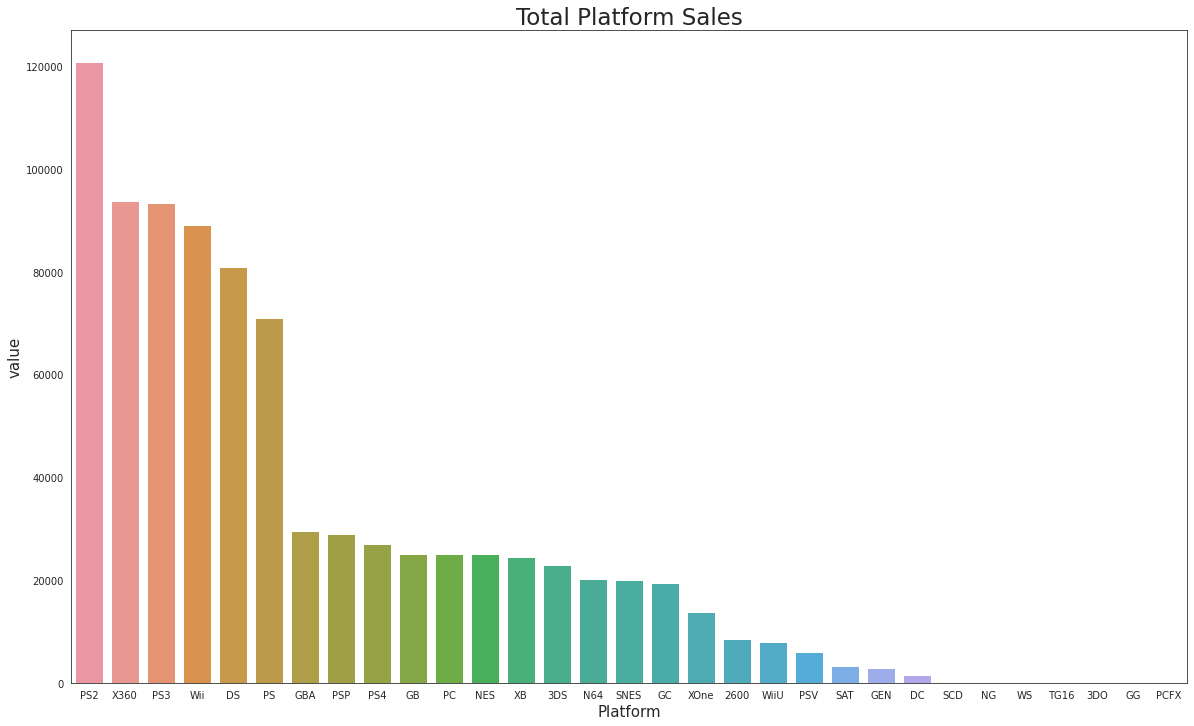

In [47]:
sns.set_style('white')
fig= plt.figure(figsize=(20,12))
area1 = fig.add_subplot(1,1,1)
area1.set_title('Total Platform Sales',fontsize=23)
area1.set_xlabel('Platform',fontsize=15)
area1.set_ylabel('value',fontsize=15)
g= sns.barplot(data=pf_Sales_sum_tidy,x='Platform',y='value',ax=area1)
GP_vis= plt.show(g)
GP_vis

### 지역에 따른 선호 장르

#### 전체 지역 선호 장르

In [48]:
Genre_tidy=gb_Genre.melt()

In [49]:
Genre_tidy = Genre_tidy.sort_values(by='value',ascending=False)
Genre_tidy.head()

,variable,value
48,SUM_Sales,168170.0
58,SUM_Sales,128755.0
56,SUM_Sales,100540.0
55,SUM_Sales,88490.0
0,NA_Sales,83728.0


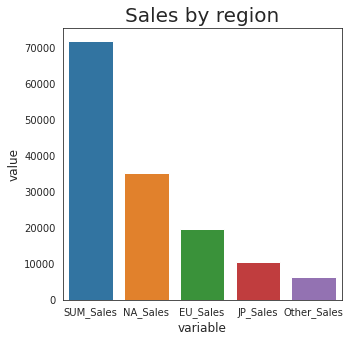

In [50]:
sns.set_style('white')
fig= plt.figure(figsize=(5,5))
area2 = fig.add_subplot(1,1,1)
area2.set_title('Sales by region',fontsize=20)
area2.set_xlabel('Genre',fontsize=12)
area2.set_ylabel('value',fontsize=12)
g2= sns.barplot(data=Genre_tidy,x='variable',y='value',ax=area2,ci=None)
Genre_t_vis= plt.show(g2)
Genre_t_vis

In [51]:
Genre_total_Sales = Genre_total_Sales.melt().sort_values(by='value',ascending=False)
Genre_total_Sales

,Genre,value
0,Action,168170.0
10,Sports,128755.0
8,Shooter,100540.0
7,Role-Playing,88490.0
4,Platform,81388.0
3,Misc,77191.0
6,Racing,70786.0
2,Fighting,43892.0
9,Simulation,38358.0
5,Puzzle,24019.0


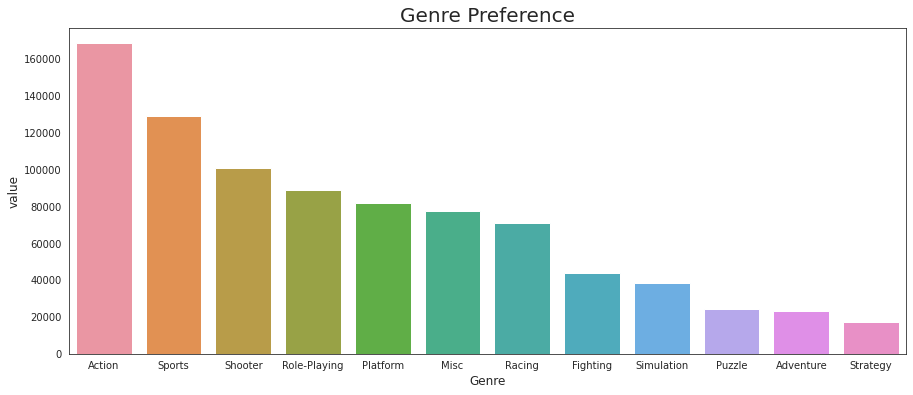

In [52]:
sns.set_style('white')
fig= plt.figure(figsize=(15,6))
area11 = fig.add_subplot(1,1,1)
area11.set_title('Genre Preference',fontsize=20)
area11.set_xlabel('Genre',fontsize=12)
area11.set_ylabel('value',fontsize=12)
g11= sns.barplot(data=Genre_total_Sales,x='Genre',y='value',ax=area11,ci=None)
total_genre_vis= plt.show(g11)
total_genre_vis

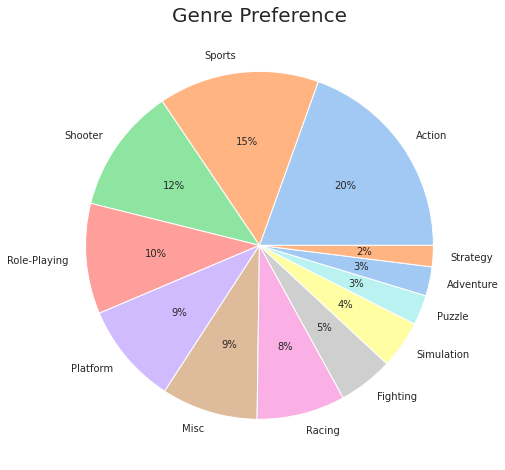

In [53]:
sns.set_style('white')
fig12= plt.figure(figsize=(8,8))
area12 = fig12.add_subplot(1,1,1)
area12.set_title('Genre Preference',fontsize=20)

#define data
labels= Genre_total_Sales['Genre']
data = Genre_total_Sales['value']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:11]

#create pie chart

g12= plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
pie_total_genre= plt.show(g12)
pie_total_genre

#### North America genre preference

In [54]:
na_genre=gb_Genre['NA_Sales']
na_genre_tidy = pd.DataFrame(na_genre)
na_genre_tidy = na_genre_tidy.T
na_genre_tidy = na_genre_tidy.melt().sort_values(by='value',ascending=False)
na_genre_tidy

,Genre,value
0,Action,83728.0
10,Sports,65592.0
8,Shooter,56205.0
4,Platform,44016.0
3,Misc,39064.0
6,Racing,34275.0
7,Role-Playing,31716.0
2,Fighting,21899.0
9,Simulation,17819.0
5,Puzzle,12150.0


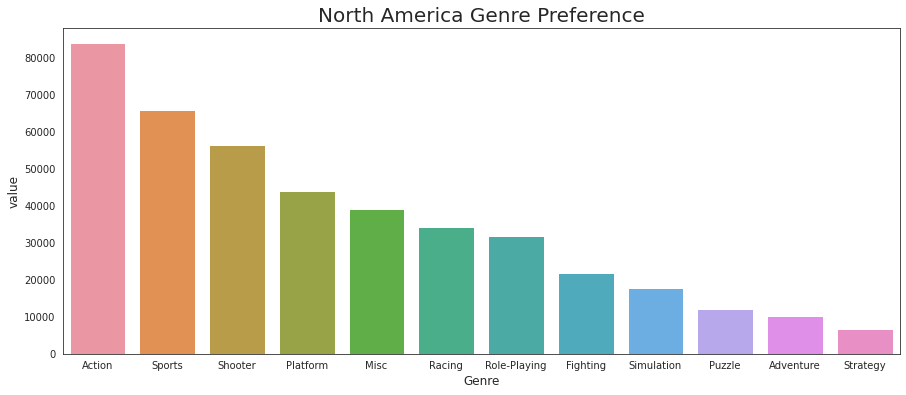

In [55]:
sns.set_style('white')
fig= plt.figure(figsize=(15,6))
area3 = fig.add_subplot(1,1,1)
area3.set_title('North America Genre Preference',fontsize=20)
area3.set_xlabel('Genre',fontsize=12)
area3.set_ylabel('value',fontsize=12)
g3= sns.barplot(data=na_genre_tidy,x='Genre',y='value',ax=area3,ci=None)
na_genre_vis= plt.show(g3)
na_genre_vis

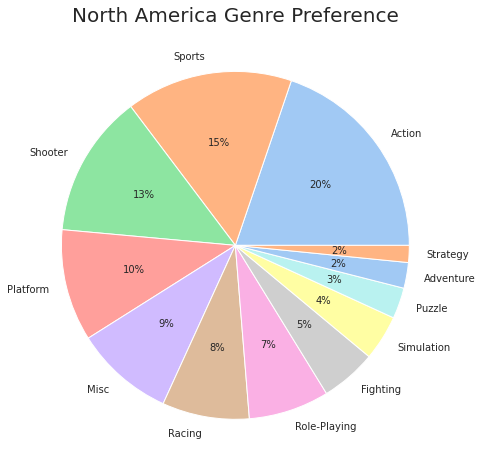

In [56]:
sns.set_style('white')
fig8= plt.figure(figsize=(8,8))
area8 = fig8.add_subplot(1,1,1)
area8.set_title('North America Genre Preference',fontsize=20)

#define data
labels= na_genre_tidy['Genre']
data = na_genre_tidy['value']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:11]

#create pie chart

g8= plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
pie_na_genre= plt.show(g8)
pie_na_genre

#### EU genre preference

In [57]:
eu_genre=gb_Genre['EU_Sales']
eu_genre_tidy = pd.DataFrame(eu_genre)
eu_genre_tidy = eu_genre_tidy.T
eu_genre_tidy = eu_genre_tidy.melt().sort_values(by='value',ascending=False)
eu_genre_tidy

,Genre,value
0,Action,50661.0
10,Sports,36713.0
8,Shooter,30411.0
6,Racing,23298.0
3,Misc,20533.0
4,Platform,19301.0
7,Role-Playing,18148.0
9,Simulation,11188.0
2,Fighting,9848.0
1,Adventure,6347.0


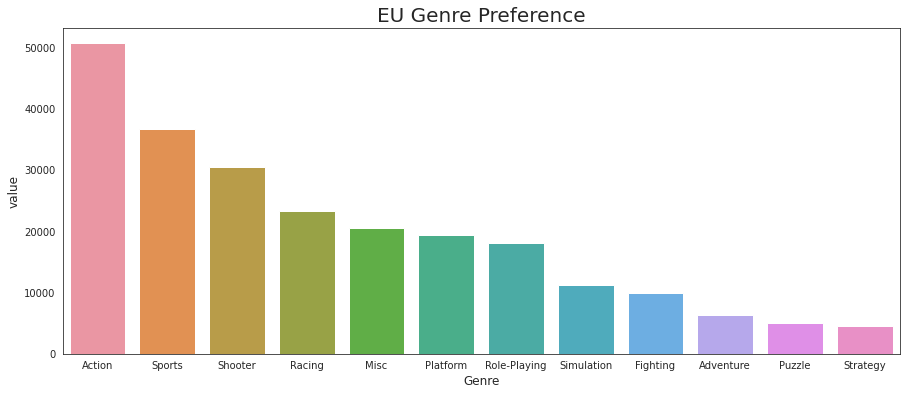

In [58]:
sns.set_style('white')
fig= plt.figure(figsize=(15,6))
area4 = fig.add_subplot(1,1,1)
area4.set_title('EU Genre Preference',fontsize=20)
area4.set_xlabel('Genre',fontsize=12)
area4.set_ylabel('value',fontsize=12)
g4= sns.barplot(data=eu_genre_tidy,x='Genre',y='value',ax=area4,ci=None)
eu_genre_vis= plt.show(g4)
eu_genre_vis

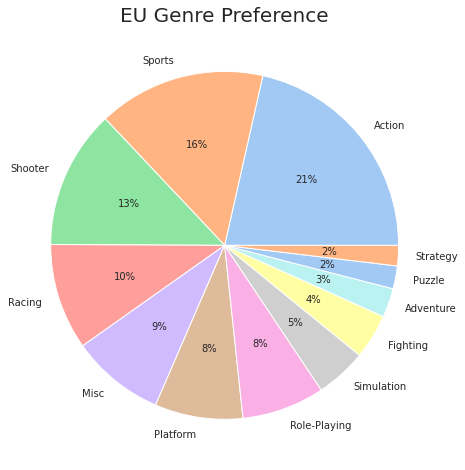

In [59]:
sns.set_style('white')
fig9= plt.figure(figsize=(8,8))
area9 = fig9.add_subplot(1,1,1)
area9.set_title('EU Genre Preference',fontsize=20)

#define data
labels= eu_genre_tidy['Genre']
data = eu_genre_tidy['value']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:11]

#create pie chart

g9= plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
pie_eu_genre= plt.show(g9)
pie_eu_genre

#### Japan genre preference

In [60]:
jp_genre=gb_Genre['JP_Sales']
jp_genre_tidy = pd.DataFrame(jp_genre)
jp_genre_tidy = jp_genre_tidy.T
jp_genre_tidy = jp_genre_tidy.melt().sort_values(by='value',ascending=False)
jp_genre_tidy

,Genre,value
7,Role-Playing,33115.0
0,Action,15516.0
10,Sports,13331.0
4,Platform,12974.0
3,Misc,10376.0
2,Fighting,8580.0
9,Simulation,6226.0
5,Puzzle,5624.0
6,Racing,5604.0
1,Adventure,5179.0


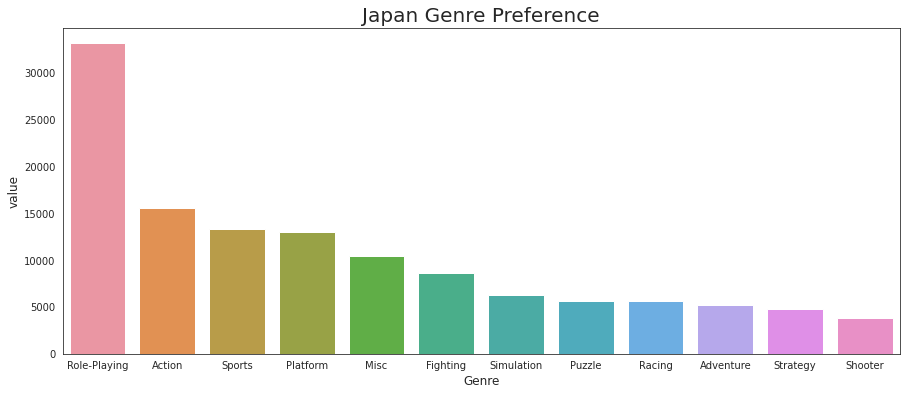

In [61]:
sns.set_style('white')
fig= plt.figure(figsize=(15,6))
area5 = fig.add_subplot(1,1,1)
area5.set_title('Japan Genre Preference',fontsize=20)
area5.set_xlabel('Genre',fontsize=12)
area5.set_ylabel('value',fontsize=12)
g5= sns.barplot(data=jp_genre_tidy,x='Genre',y='value',ax=area5,ci=None)
jp_genre_vis= plt.show(g5)
jp_genre_vis

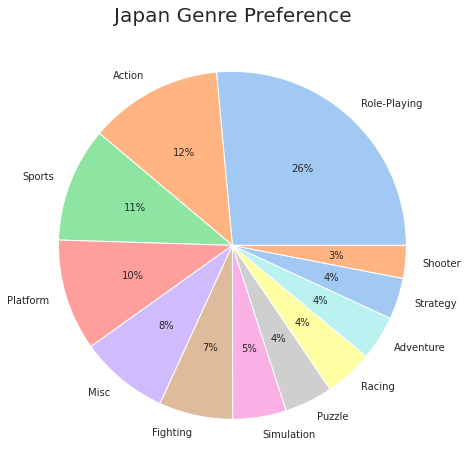

In [62]:
sns.set_style('white')
fig10= plt.figure(figsize=(8,8))
area10 = fig10.add_subplot(1,1,1)
area10.set_title('Japan Genre Preference',fontsize=20)

#define data
labels= jp_genre_tidy['Genre']
data = jp_genre_tidy['value']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:11]

#create pie chart

g10= plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
pie_jp_genre= plt.show(g10)
pie_jp_genre

#### Other genre preference

In [63]:
other_genre=gb_Genre['Other_Sales']
other_genre_tidy = pd.DataFrame(other_genre)
other_genre_tidy = other_genre_tidy.T
other_genre_tidy = other_genre_tidy.melt().sort_values(by='value',ascending=False)
other_genre_tidy

,Genre,value
0,Action,18265.0
10,Sports,13119.0
8,Shooter,10112.0
6,Racing,7609.0
3,Misc,7218.0
7,Role-Playing,5511.0
4,Platform,5097.0
2,Fighting,3565.0
9,Simulation,3125.0
1,Adventure,1642.0


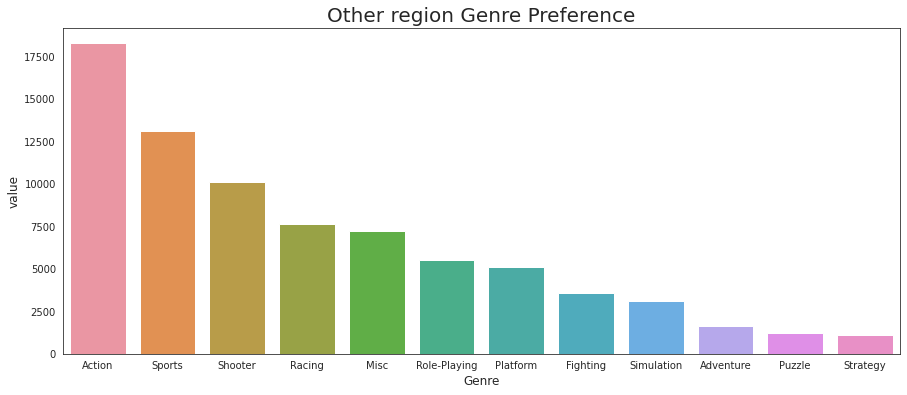

In [64]:
sns.set_style('white')
fig= plt.figure(figsize=(15,6))
area6 = fig.add_subplot(1,1,1)
area6.set_title('Other region Genre Preference',fontsize=20)
area6.set_xlabel('Genre',fontsize=12)
area6.set_ylabel('value',fontsize=12)
g6= sns.barplot(data=other_genre_tidy,x='Genre',y='value',ax=area6,ci=None)
other_genre_vis= plt.show(g6)
other_genre_vis

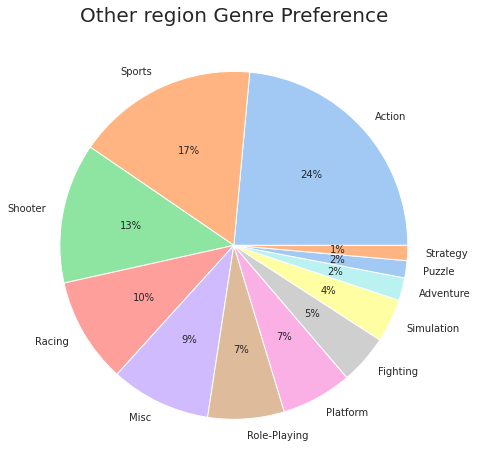

In [65]:
sns.set_style('white')
fig7= plt.figure(figsize=(8,8))
area7 = fig7.add_subplot(1,1,1)
area7.set_title('Other region Genre Preference',fontsize=20)

#define data
labels= other_genre_tidy['Genre']
data = other_genre_tidy['value']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:11]

#create pie chart

g7= plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
pie_other_genre= plt.show(g7)
pie_other_genre

#### 지역 따른 선호 다른 차트

In [66]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

In [67]:
gb_Genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
Genre,,,,,
Action,83728.0,50661.0,15516.0,18265.0,168170.0
Adventure,10103.0,6347.0,5179.0,1642.0,23271.0
Fighting,21899.0,9848.0,8580.0,3565.0,43892.0
Misc,39064.0,20533.0,10376.0,7218.0,77191.0
Platform,44016.0,19301.0,12974.0,5097.0,81388.0
Puzzle,12150.0,5006.0,5624.0,1239.0,24019.0
Racing,34275.0,23298.0,5604.0,7609.0,70786.0
Role-Playing,31716.0,18148.0,33115.0,5511.0,88490.0
Shooter,56205.0,30411.0,3812.0,10112.0,100540.0


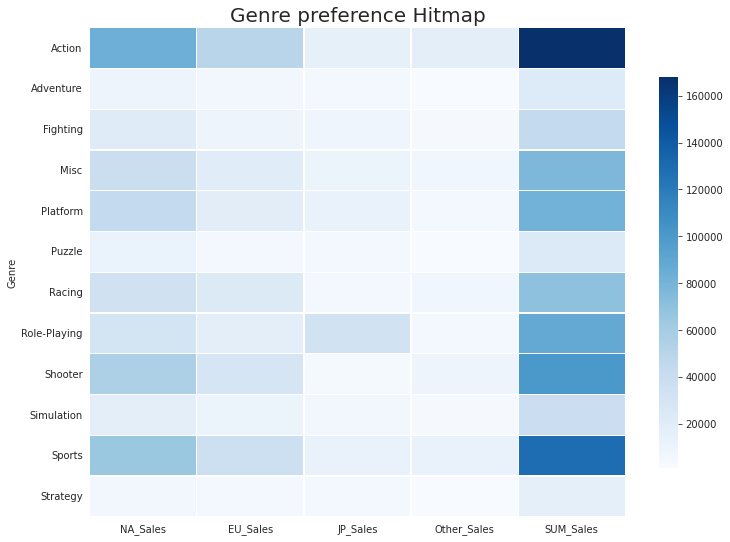

In [68]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(gb_Genre, cmap="Blues",
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.title('Genre preference Hitmap', fontsize=20)
plt.show()

### 연도별 게임 트랜드 파악하기

In [69]:
#Year,Genre, Sales_sum이 필요

In [70]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,SUM_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4.0,0.0,0.0,0.0,4.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,17.0,0.0,0.0,1.0,18.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,2.0,0.0,2.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,4.0,0.0,0.0,0.0,4.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,12.0,9.0,0.0,4.0,25.0


In [71]:
Year_Trend_df = df[['Year','Genre','SUM_Sales']]
Year_Trend_df

,Year,Genre,SUM_Sales
0,2008,Action,4.0
1,2009,Action,18.0
2,2010,Adventure,2.0
3,2010,Misc,4.0
4,2010,Platform,25.0
...,...,...,...
16593,2006,Platform,20.0
16594,2005,Action,1.0
16595,2015,Sports,79.0
16596,2013,Action,38.0


In [76]:
Year_melt= pd.melt(Year_Trend_df,id_vars='Year')
Year_melt

,Year,variable,value
0,2008,Genre,Action
1,2009,Genre,Action
2,2010,Genre,Adventure
3,2010,Genre,Misc
4,2010,Genre,Platform
...,...,...,...
32477,2006,SUM_Sales,20
32478,2005,SUM_Sales,1
32479,2015,SUM_Sales,79
32480,2013,SUM_Sales,38


In [ ]:
#tidy